<h2 style="color: #37709F">Tratamento de dados</h2>

- **O que vamos aprender:**
    - utilizar a bilioteca Prophet do Facebook para realizar análises preditivas
    - utilizar a biblica Yahoo Finance para buscar dados de ações
    
- **Projeto da aula:**

    - Prever o valor futuro de uma ação.

<h2 style="color: #37709F">Instalando e carregando as bibliotecas</h2>

In [1]:
!pip install yfinance prophet

     --------------------------------------- 12.9/12.9 MB 81.8 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ---------------------------------------- 514.2/514.2 kB ? eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 94.7 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=63ca01fb5da71381d1b8b77c7ca848d52a7b4329305f72d50c692f7887ae0125
  Stored in directory: c:\users\fernando\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


In [2]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

<h2 style="color: #37709F">Carregando os dados históricos</h2>

In [3]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada: PETR4.SA


<h2 style="color: #37709F">Gráfico da variação do período histórico</h2>

<Axes: xlabel='Date'>

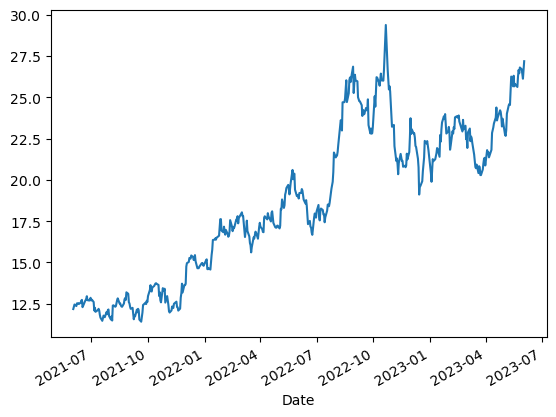

In [5]:
dados.Close.plot()

<h2 style="color: #37709F">Preparando os dados de treinamento</h2>

In [6]:
# resetando o índice do DataFrame
treinamento = dados.reset_index()

In [7]:
# retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [8]:
# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[['Date', 'Close']]

In [9]:
# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ['ds', 'y']

<h2 style="color: #37709F">Treinando o nosso modelo</h2>

In [12]:
# criando o modelo
modelo = Prophet()

# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)

# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)

# gerando as previsões
previsoes = modelo.predict(periodo)


21:06:58 - cmdstanpy - INFO - Chain [1] start processing
21:06:58 - cmdstanpy - INFO - Chain [1] done processing


<h2 style="color: #37709F">Gerando o gráfico de previsões</h2>

In [13]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")